In [129]:
import pandas as pd
import numpy as np

In [131]:
data=pd.read_csv('Housing.csv')
df=pd.DataFrame(data)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [133]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [135]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [139]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [141]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [143]:
#labeling features 
le=LabelEncoder()
oe=OneHotEncoder()
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})


In [145]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Define columns to scale (all features + target, excluding binary 0/1 dummies)
cols_to_scale = [
    'price', 'area', 'bedrooms', 'bathrooms', 
    'stories', 'parking', 
    # Add other continuous features if you kept them, like 'parking'
]

# Apply scaling
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Numerical features (including price) have been scaled to a 0-1 range.")

Numerical features (including price) have been scaled to a 0-1 range.


In [147]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,furnished


In [149]:
# Creates k-1 columns automatically
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [115]:
#correlation analysis: since numeric data feature seln method using is from Filter method
# Assuming your DataFrame is named 'df' and contains the data you showed

# 1. Calculate the full correlation matrix
correlation_matrix = df.corr()

# 2. Extract the correlations with the target variable 'price'
# Sort the results to easily identify the strongest predictors.
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# 3. Print the results
print("--- Correlation of Features with House Price (Sorted) ---")
print(price_correlations)

--- Correlation of Features with House Price (Sorted) ---
price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


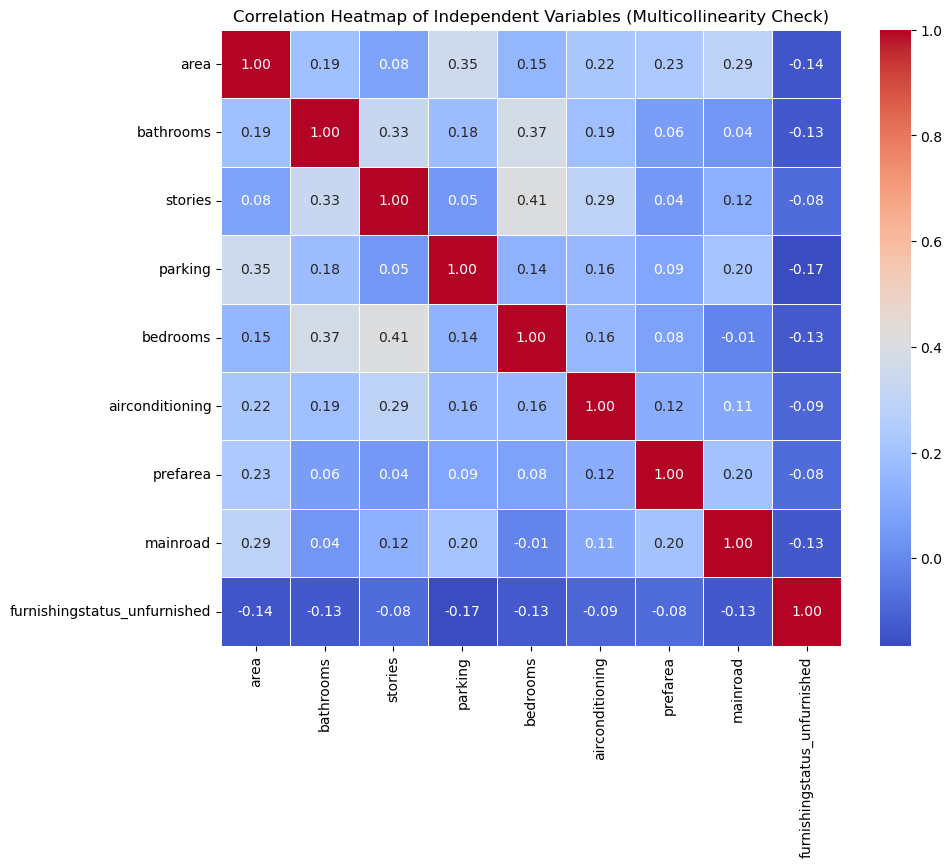

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# The X_features list from the previous step
X_features = [
    'area', 'bathrooms', 'stories', 'parking', 'bedrooms', 
    'airconditioning', 'prefarea', 'mainroad', 'furnishingstatus_unfurnished'
]

# Calculate the correlation matrix
multicollinearity_matrix = df[X_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Set size for better readability
sns.heatmap(
    multicollinearity_matrix,
    annot=True,          # Annotate the squares with the correlation values
    cmap='coolwarm',     # Use a diverging colormap (shows positive/negative well)
    fmt=".2f",           # Format the numbers to two decimal places
    linewidths=.5,       # Add lines for clarity
    cbar=True
)
plt.title('Correlation Heatmap of Independent Variables (Multicollinearity Check)')
plt.show()

In [161]:
# Assuming your full, encoded DataFrame is still named 'df'

# 1. Define the final list of selected features (X) plus the target (Y)
FINAL_COLS = [
    'price',                   # The Target Variable (Y)
    'area', 
    'bathrooms', 
    'stories', 
    'parking', 
    'bedrooms', 
    'airconditioning', 
    'prefarea', 
    'mainroad', 
]

# 2. Create the new DataFrame containing only the selected columns
df_updated = df[FINAL_COLS].copy()

# 3. Quick check of the new DataFrame structure
print("--- Updated DataFrame (df_updated) ---")
print(f"Shape: {df_updated.shape}")
print(df_updated.head())

--- Updated DataFrame (df_updated) ---
Shape: (545, 9)
      price      area  bathrooms   stories   parking  bedrooms  \
0  1.000000  0.396564   0.333333  0.666667  0.666667       0.6   
1  0.909091  0.502405   1.000000  1.000000  1.000000       0.6   
2  0.909091  0.571134   0.333333  0.333333  0.666667       0.4   
3  0.906061  0.402062   0.333333  0.333333  1.000000       0.6   
4  0.836364  0.396564   0.000000  0.333333  0.666667       0.6   

   airconditioning  prefarea  mainroad  
0                1         1         1  
1                1         0         1  
2                0         1         1  
3                1         1         1  
4                1         0         1  


In [165]:
X = df_updated.drop('price', axis=1)
y = df_updated['price']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2
)

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [204]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f'R2_score:{r2_score(y_pred,y_test)}')
print(f'MSE:{mean_squared_error(y_pred,y_test)}')
print(f'MAE:{mean_absolute_error(y_pred,y_test)}')

R2_score:0.48272851042053877
MSE:0.010980092493598374
MAE:0.07283748460487455


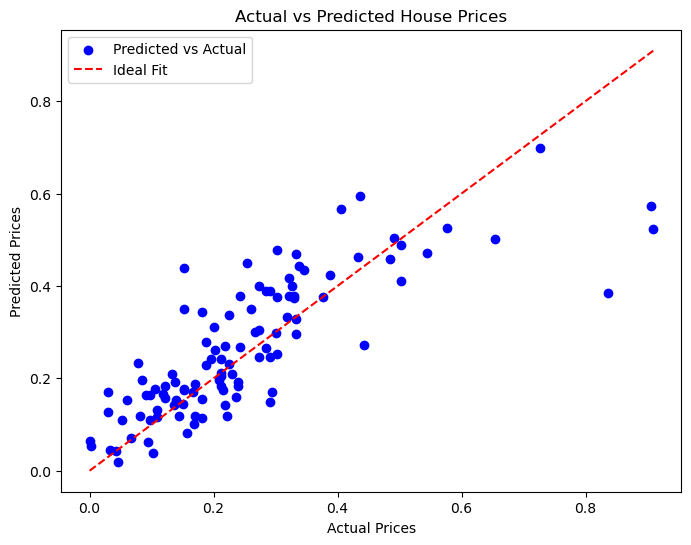

In [206]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [208]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# 1. Initialize the SGD Regressor
# We set parameters for the optimization process:
#   - max_iter: how many steps (epochs) to take
#   - eta0: the initial learning rate (how big the steps are)
#   - random_state: for reproducibility
sgd_model = SGDRegressor(
    max_iter=1000, 
    eta0=0.01, 
    random_state=32, 
    tol=1e-3 # Stop when loss improves by less than this
)

# 2. Fit the model (This uses Gradient Descent)
sgd_model.fit(X_train, y_train)

# 3. Evaluate the new model
y_pred_sgd = sgd_model.predict(X_test)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("--- SGD Regressor (Gradient Descent) Results ---")
print(f"R-squared (SGD Model): {r2_sgd:.4f}")

--- SGD Regressor (Gradient Descent) Results ---
R-squared (SGD Model): 0.5024


In [ ]:
''' The model is linear but data is appearing like non linear, so a linear model cannot handle or capture effectively .
We can go with other models like XGBoost or RandomForest '''